# Final Model Development

After examinig at classification trees, b

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS

import seaborn as sns
sns.set()

In [3]:
from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [78]:
#lampsdata = pd.read_csv('data/crimes_with_lamps.csv')
#propertydata= pd.read_csv('data/crimes_with_property.csv')
#weatherdata = pd.read_csv('data/weather_boston.csv')
master = pd.read_csv('data/crimes_nat_tinker.csv')
master = pd.get_dummies(master, columns=["DAY_OF_WEEK"])
#master.isna().sum()
master = master.dropna(how='any',axis=0) 

In [79]:
master.head()

,Unnamed: 0,Unnamed: 0.1,Lat,Long,MONTH,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,SHOOTING,category,police_min_dist,police_density,hospital_min_dist,hospital_density,school_min_dist,school_density,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,0,0,42.259518,-71.121563,10,9,59.0,0.00,0.0,454000.0,4.406696e+05,0.001234,563.0,0,theft,0.004067,1.0,0.041388,0.0,0.004665,4.0,0,0,0,1,0,0,0
1,1,1,42.262092,-71.116710,10,20,56.0,0.01,0.0,541300.0,4.528877e+05,0.000539,531.0,0,theft,0.009414,1.0,0.036018,0.0,0.001244,3.0,0,0,1,0,0,0,0
2,2,2,42.352375,-71.135096,10,15,56.0,0.01,0.0,259900.0,5.895101e+05,0.000167,1272.0,0,theft,0.015767,0.0,0.010692,0.0,0.002624,3.0,0,0,1,0,0,0,0
3,3,3,42.349476,-71.076402,10,4,56.0,0.01,0.0,492000.0,1.666753e+06,0.000074,4461.0,0,theft,0.012329,0.0,0.012304,0.0,0.001918,6.0,0,0,1,0,0,0,0
4,4,4,42.381846,-71.066551,10,8,71.0,0.22,0.0,836900.0,6.054951e+05,0.000108,2672.0,0,theft,0.011801,0.0,0.016170,0.0,0.002848,3.0,0,0,0,0,0,0,1


In [80]:
X, y = master.drop(['category', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1), master['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train, test = train_test_split(master, test_size=0.2, random_state=42)


# Fit Random Forrest

In [81]:
#Find optimal depth of trees
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 3, 20, 4
for i in range(tree_depth_start, tree_depth_end, steps):
    model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1)
    all_CV_acc[i] = score
    mean_CV_acc[i] = score.mean()
    
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

The best depth was found to be: 15


In [82]:
#Training
model = RandomForestClassifier(n_estimators=int(X_train.shape[1]/2), max_depth=best_depth)
model.fit(X_train, y_train)

#Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Perfromance Evaluation
acc_random_forest_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_random_forest_training))
print("Random Forest: Accuracy, Testing Set :  {:0.2f}%".format(acc_random_forest_testing))

Random Forest: Accuracy, Training Set : 45.25%
Random Forest: Accuracy, Testing Set :  28.52%


In [83]:
import collections, numpy
collections.Counter(y_pred_train)


Counter({'drugs': 12640,
         'domestic': 62244,
         'violent': 21331,
         'theft': 58408,
         'petty theft': 14127,
         'medical': 11177,
         'vandalism': 5551,
         'mv accident': 8546,
         'civil disruption': 1601,
         'burglary ': 882,
         'possession weapons': 420})

In [65]:
master['category'].value_counts()

theft                 41867
domestic              37742
violent               33606
medical               27298
vandalism             23527
mv accident           22040
petty theft           22006
drugs                 19463
burglary               9311
possession weapons     4972
civil disruption       4327
Name: category, dtype: int64

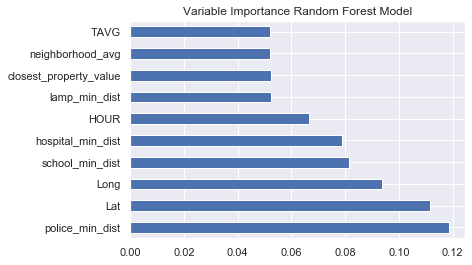

In [86]:
fig, ax = plt.subplots()
feat_import_tree20 = pd.Series(model.feature_importances_, index = X_train.columns) 
feat_import_tree20.nlargest(10).plot(kind = 'barh', title = "Variable Importance Random Forest Model")
                                     
                                     